In [1]:
import numpy as np
import re
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
# from geosoft.gxpy import gdb as gxdb
# import geosoft.gxpy.utility as gxu
# import geosoft.gxpy.gx as gx
import dask.array as da
import GeoToolkit

# Load the geotiff and export to zarr

In [52]:
name = "\cdem_dem_093H"
rootdir = r"C:\Users\DominiqueFournier\Downloads\cdem_dem_093H_tif"
outdir = r"C:\Users\DominiqueFournier\Dropbox\MDRU_GBC_GAP\Data\Topography"

In [53]:
GeoToolkit.Mag.DataIO.gdalWarp(rootdir + name + "_NAD83_Zone10.tif", rootdir + name + ".tif", 26910)

In [54]:
grid = GeoToolkit.Mag.DataIO.loadGeoTiffFile(rootdir + name + "_NAD83_Zone10.tif")

In [55]:
xyz = xr.DataArray(grid.values, dims=("y", "x"), coords={"x": grid.hx, "y": grid.hy})

cded = xr.Dataset(
        data_vars={'topo': xyz},
)


In [56]:
cded.to_zarr(outdir + name + ".zarr")

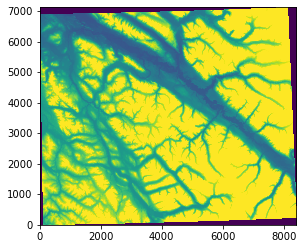

In [57]:
axs = plt.subplot()
axs.imshow(cded["topo"].values, clim=[300, 1500], origin='lower')

# xyz.plot(yincrease=False)
# 
